In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [5]:
df = pd.read_csv('stock_data.csv')

In [6]:
df

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2017-01-13,38900,39380,38240,38430,1321200,51197289000
1,2017-01-12,38300,38450,37930,38010,800900,30540359000
2,2017-01-11,38710,38880,38480,38560,545900,21089798000
3,2017-01-10,38620,38850,38150,38690,1196900,46107703000
4,2017-01-06,40500,41030,39720,39720,1435500,57708934000
...,...,...,...,...,...,...,...
1228,2012-01-11,14360,14750,14280,14590,1043400,15191988000
1229,2012-01-10,13890,14390,13860,14390,952300,13533413000
1230,2012-01-06,13990,14030,13790,13850,765500,10635609000
1231,2012-01-05,13720,13840,13600,13800,511500,7030811000


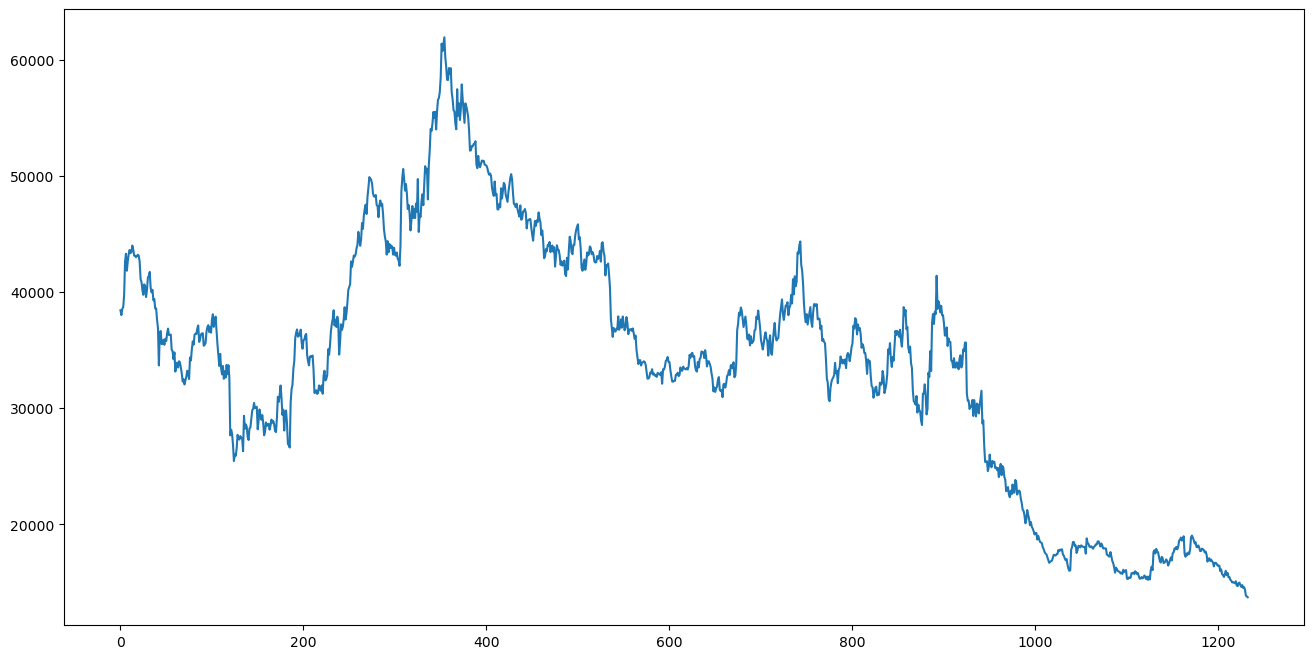

In [7]:
data = df.sort_index(ascending=True, axis=0)
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [8]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

In [9]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

In [11]:
df

,Date,Open,High,Low,Close,Volume,Stock Trading
Date,,,,,,,
2017-01-13,2017-01-13,38900,39380,38240,38430,1321200,51197289000
2017-01-12,2017-01-12,38300,38450,37930,38010,800900,30540359000
2017-01-11,2017-01-11,38710,38880,38480,38560,545900,21089798000
2017-01-10,2017-01-10,38620,38850,38150,38690,1196900,46107703000
2017-01-06,2017-01-06,40500,41030,39720,39720,1435500,57708934000
...,...,...,...,...,...,...,...
2012-01-11,2012-01-11,14360,14750,14280,14590,1043400,15191988000
2012-01-10,2012-01-10,13890,14390,13860,14390,952300,13533413000
2012-01-06,2012-01-06,13990,14030,13790,13850,765500,10635609000


In [12]:
for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

/var/folders/yr/j2xc9qx96w9b2br7t_zzqs5c0000gn/T/ipykernel_89050/596060278.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  new_data['Date'][i] = data['Date'][i]
/var/folders/yr/j2xc9qx96w9b2br7t_zzqs5c0000gn/T/ipykernel_89050/596060278.p

In [13]:
train = new_data[:950]
valid = new_data[950:]

In [16]:
valid

,Date,Close
950,2013-02-25,26000
951,2013-02-22,25170
952,2013-02-21,24910
953,2013-02-20,25450
954,2013-02-19,25320
...,...,...
1228,2012-01-11,14590
1229,2012-01-10,14390
1230,2012-01-06,13850
1231,2012-01-05,13800


In [17]:
print('\n Shape of training set:')
print(train.shape)


 Shape of training set:
(950, 2)


In [18]:
print('\n Shape of validation set:')
print(valid.shape)


 Shape of validation set:
(283, 2)


In [19]:
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-283+i:].sum() + sum(preds)
    b = a/283
    preds.append(b)

In [20]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
16327.354645376681


/var/folders/yr/j2xc9qx96w9b2br7t_zzqs5c0000gn/T/ipykernel_89050/970735549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
/var/folders/yr/j2xc9qx96w9b2br7t_zzqs5c0000gn/T/ipykernel_89050/970735549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = preds


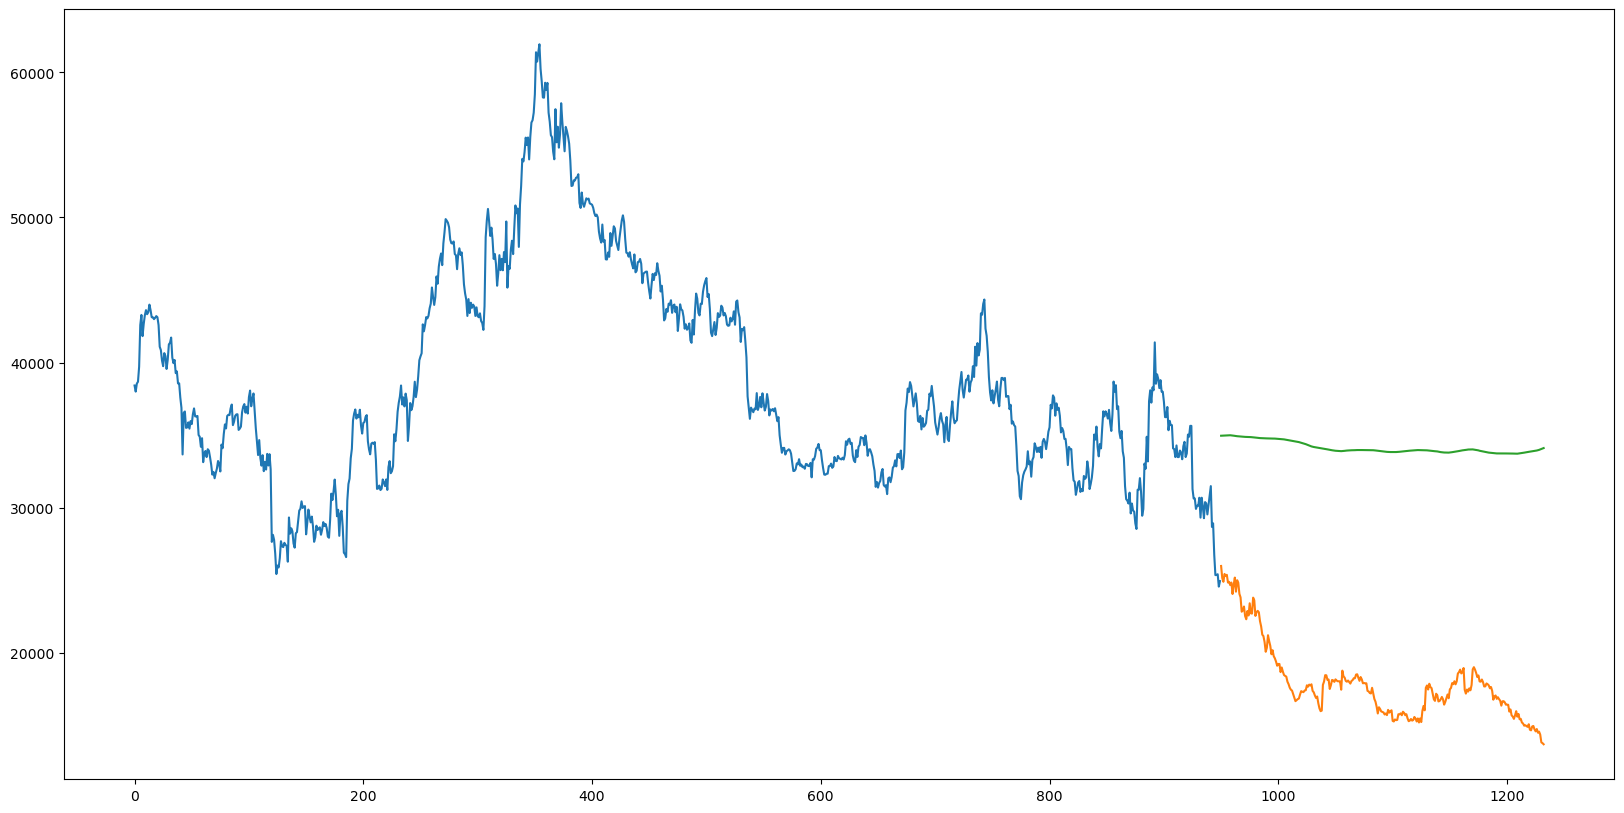

In [21]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

# Linear Regression

In [22]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

In [23]:
data = df.sort_index(ascending=True, axis=0)

In [24]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

In [25]:
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

/var/folders/yr/j2xc9qx96w9b2br7t_zzqs5c0000gn/T/ipykernel_89050/1661545886.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_data['Date'][i] = data['Date'][i]
/var/folders/yr/j2xc9qx96w9b2br7t_zzqs5c0000gn/T/ipykernel_89050/1661545886.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` inst

In [26]:
from fastai.tabular import  add_datepart
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

ModuleNotFoundError: No module named 'fastai'

In [27]:
train = new_data[:950]
valid = new_data[950:]

In [28]:
x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [36]:
print(model.intercept_)

-19059256.55107977


In [37]:
print(model.coef_)

[ 9.450363e+03  6.024583e+04 -9.910821e+01  1.976143e+03  1.712218e+01 -1.947625e+03  3.083976e+02 -8.593622e+02
 -2.804555e+02  1.088693e+03  0.000000e+00  0.000000e+00]


In [39]:
ypred = model.predict(x_train)

In [41]:
print(ypred)

[15168.021781 15213.661694 15259.301607 15222.897824 ... 49593.517063 49639.156976 49684.796889 49730.436803]


In [43]:
from sklearn import metrics

In [46]:
preds = model.predict(x_valid)
rms=np.sqrt(metrics.mean_squared_error(y_valid,preds))
rms

21315.566712591255

In [47]:
print(metrics.mean_absolute_error(y_valid,preds))

20137.79584837273


In [49]:
valid['Predictions'] = 0
valid['Predictions'] = preds
valid.index = new_data[950:].index
train.index = new_data[:950].index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


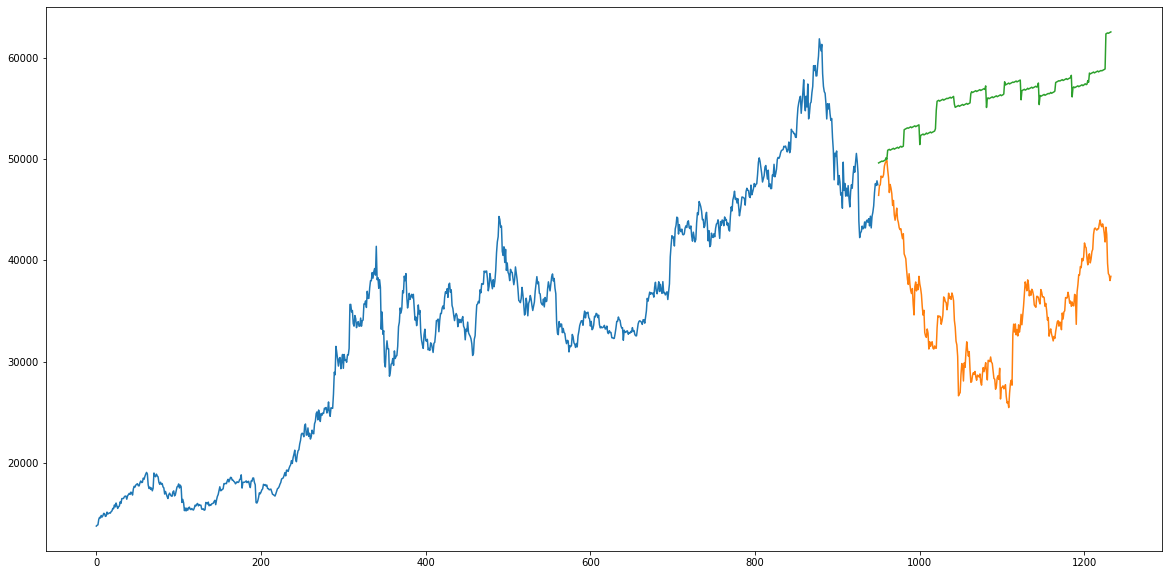

In [50]:
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

# k Nearest Neighbour

In [51]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [52]:
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

In [53]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

In [54]:
model.fit(x_train,y_train)
preds = model.predict(x_valid)

In [55]:
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

10188.724396928814

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


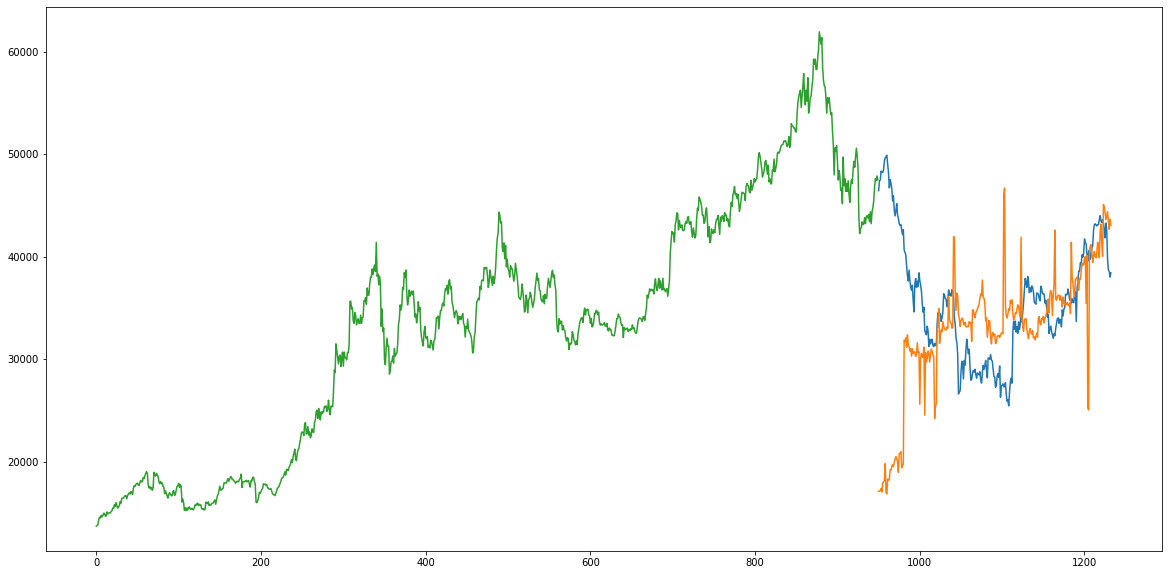

In [56]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])

# Prophet

In [57]:
from fbprophet import Prophet

In [58]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

In [59]:
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [60]:
new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']

In [61]:
new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

In [62]:
train = new_data[:950]
valid = new_data[950:]

In [63]:
model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [64]:
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)

In [65]:
forecast_valid = forecast['yhat'][950:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

22307.770208873226

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



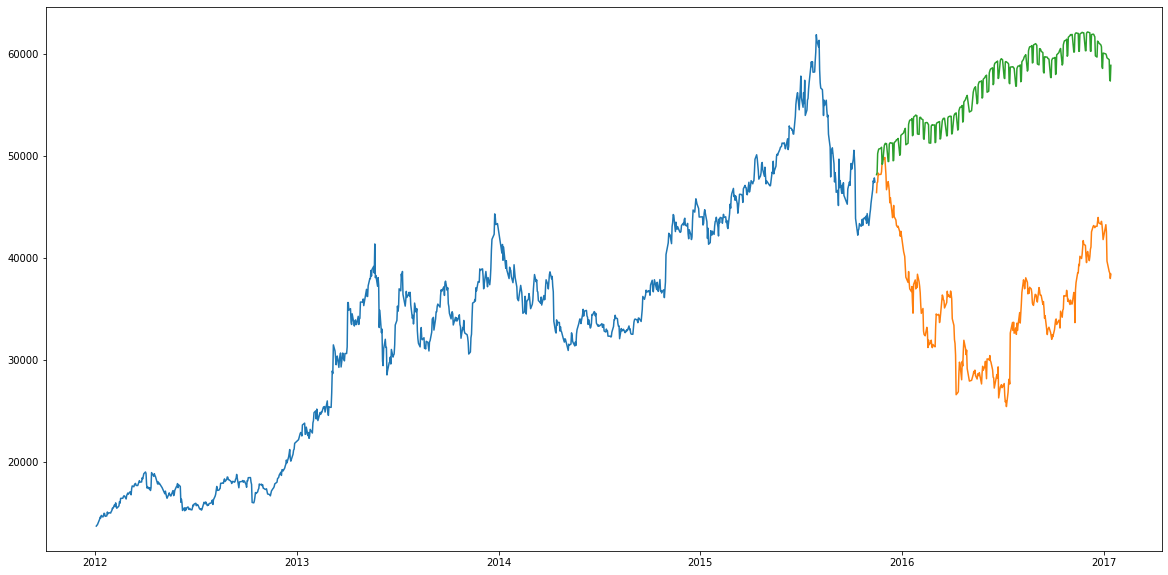

In [66]:
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values
plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])

# LSTM

In [33]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [34]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

/var/folders/yr/j2xc9qx96w9b2br7t_zzqs5c0000gn/T/ipykernel_89050/997453206.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_data['Date'][i] = data['Date'][i]
/var/folders/yr/j2xc9qx96w9b2br7t_zzqs5c0000gn/T/ipykernel_89050/997453206.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instea

(1233, 7)

In [35]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/indexes/base.py:7631: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(index_like, name=name, copy=copy)


In [36]:
dataset = new_data.values

In [37]:
train = dataset[0:950,:]
valid = dataset[950:,:]

In [40]:
len(train)


950

In [39]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [41]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [42]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [44]:
x_train.shape

(890, 60, 1)

In [45]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

890/890 - 15s - 16ms/step - loss: 0.0048


In [47]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [78]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [79]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [80]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

2330.171022728133

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



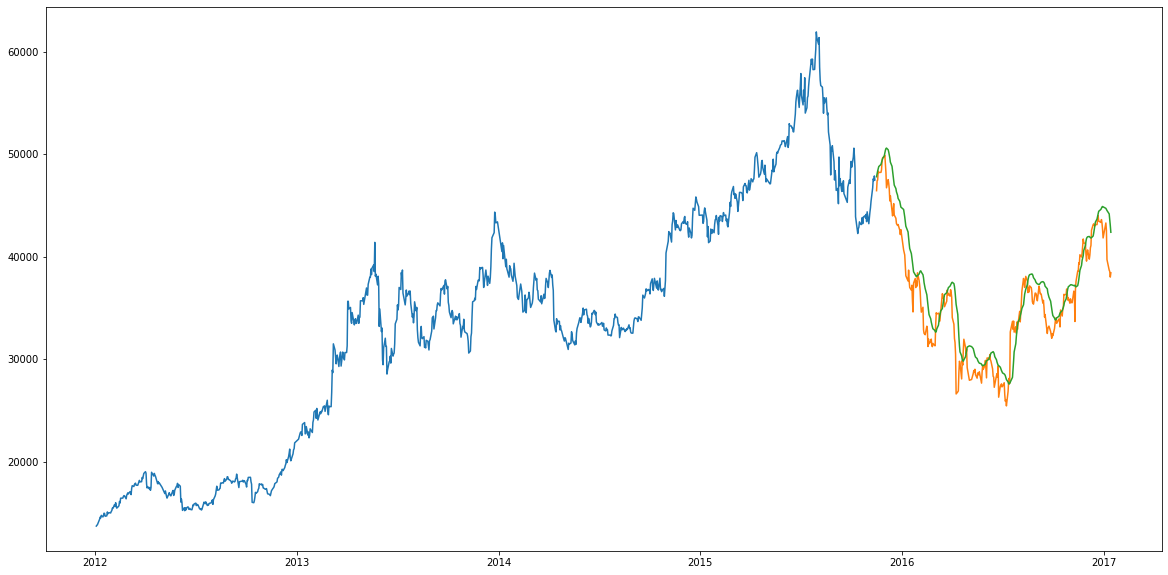

In [81]:
train = new_data[:950]
valid = new_data[950:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])